#### Imports

In [1]:
# Visualization
import matplotlib.pyplot as plt

# Builtin
from pathlib import Path
import sys
from math import nan
from itertools import islice
import subprocess
import shutil
import os
import pdb


# Add repo path to system path for additional imports. 
# Note the relative depth from this notebook to system repo
# in case you want to move this file

nb_path = str(Path(os.path.abspath("")).parent.parent)
sys.path.insert(0, nb_path)
print(f"Added {nb_path} to system path")

# This computer git repos
from project.project_manager_module import ProjectManager
import cxsystem2.neurodynlib as nd
from brian2.units import *

Added C:\Users\Simo\Laskenta\Git_Repos\SystemTools to system path


#### Build paths
<font color=red>**Set the root_path**</font>

In [2]:
#root_path = r"/opt2/Git_Repos/SystemTools/scripts/"
root_path = r"C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts/"

In [3]:
project = "FCN22"  
experiment = "Figure3B"  
experiment_path = Path.joinpath(Path(root_path), Path(project), experiment)

#### Input context

In [4]:
input_folder = "../in" # Relative to experiment path
matlab_workspace_file = "matlab_workspace_SingleSpike.mat"
conn_skeleton_file_in = "Replica_skeleton_connections_20210211_1453238_L4_SS.gz"
conn_file_out = "connections_SingleSpike_ci.gz"
input_filename = "noise_210916_SingleSpike_00.mat"  # "noise_210406_SingleSpike.mat" 
startpoint_csv_folder = "startpoint_csvs/LIF"

#### Data context for single files and arrays 
These startpoint and parameter strings are used only in this module.
The output_folder will be created under experiment

In [5]:
current_data = "Comrad_C200C100" # Current data becomes the output folder under experiment

#### Call project manager
Code complexity is hidden behind the ProjectManager

In [6]:
PM = ProjectManager(
    path=experiment_path,
    input_folder=input_folder,
    output_folder=current_data,
    matlab_workspace_file=matlab_workspace_file,
    conn_skeleton_file_in=conn_skeleton_file_in,
    conn_file_out=conn_file_out,
    input_filename=input_filename,
    NG_name="NG3_L4_SS_L4",
    t_idx_start=2000,
    t_idx_end=-2000,
    project=project,
    experiment=experiment,
    startpoint_csv_folder=startpoint_csv_folder,
)

#### Prepare and run single file: Comrad example

In [7]:
# Copy Anat and Phys csv files from start point folder to path and update paths into the csv:s
anat_file_fullpath_out , phys_file_fullpath_out = PM.prepare_csvs_for_simulation(phys_name="Phys_Comrad_221122_C200C100.csv")

# Create necessary current injection files
PM.ct.create_current_injection(randomize=False)

# Run CxSystem2 for single file. Remove the stdout=subprocess.DEVNULL to see simulation output
command_and_args = ["cxsystem2", "-a", str(anat_file_fullpath_out), "-p", str(phys_file_fullpath_out)]
subprocess.run(command_and_args, text=True, encoding="utf-8", stdout=subprocess.DEVNULL)

CompletedProcess(args=['cxsystem2', '-a', 'C:\\Users\\Simo\\Laskenta\\Git_Repos\\SystemTools\\scripts\\FCN22\\Figure3B\\Anat_Comrad_221122_C200C100.csv', '-p', 'C:\\Users\\Simo\\Laskenta\\Git_Repos\\SystemTools\\scripts\\FCN22\\Figure3B\\Phys_Comrad_221122_C200C100.csv'], returncode=0)

### Figure 3 B @Comrad

In [8]:
# file_to_display = r"[your/full/path/to/datafile].gz"  
file_to_display = None # Most recent

In [9]:
#PM.viz.save_figure_with_arrayidentifier = f"Fig3B_Comrad"
#PM.viz.save_figure_to_folder = f"Analysis_Figures"

Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure3B\Fig3B_Comrad_show_readout_on_input.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


(0.2, 0.6)

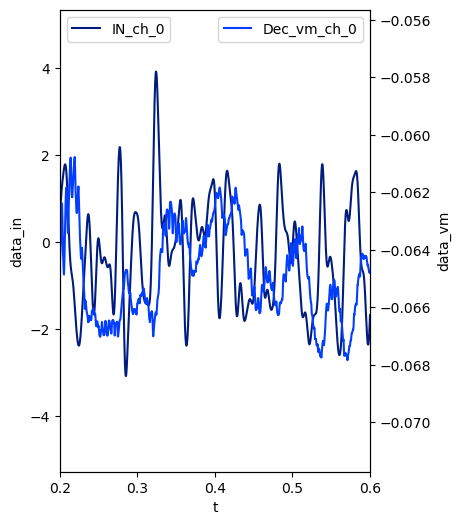

In [10]:
plt.rcParams["figure.figsize"] = (4, 6)
PM.viz.show_readout_on_input(results_filename=file_to_display, normalize=False, unit_idx_list=[0], savefigname="Fig3B_Comrad_show_readout_on_input.eps")
plt.xlim((0.2, 0.6))

Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure3B\Fig3B_Comrad_show_input_to_readout_coherence.eps


(2000.0, 6000.0)

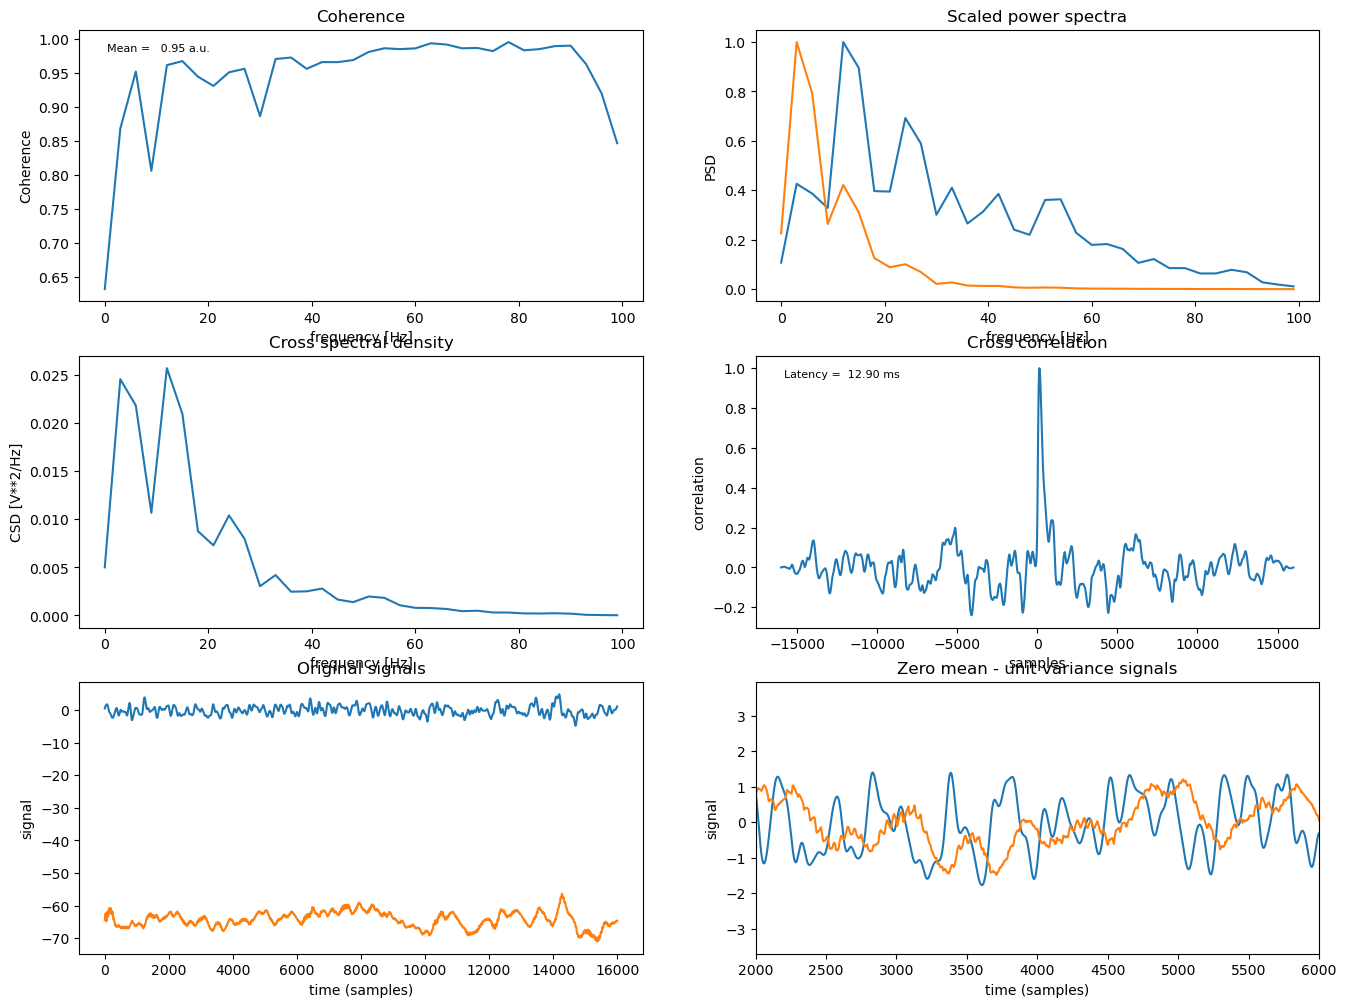

In [11]:
plt.rcParams["figure.figsize"] = (16, 12)
PM.viz.show_input_to_readout_coherence(
    results_filename=file_to_display, savefigname="Fig3B_Comrad_show_input_to_readout_coherence.eps", signal_pair=[0, 0]
)
plt.xlim((2000, 6000))

#### Prepare and run single file: HiFi example

In [12]:
current_data = "HiFi_C200C100"

In [13]:
PM.context.output_folder = experiment_path.joinpath(current_data)

In [14]:
# Copy Anat and Phys csv files from start point folder to path and update paths into the csv:s
anat_file_fullpath_out , phys_file_fullpath_out = PM.prepare_csvs_for_simulation(phys_name="Phys_HiFi_221122_C200C100.csv")

# Run CxSystem2 for single file. Remove the stdout=subprocess.DEVNULL to see simulation output
command_and_args = ["cxsystem2", "-a", str(anat_file_fullpath_out), "-p", str(phys_file_fullpath_out)]
subprocess.run(command_and_args, text=True, encoding="utf-8", stdout=subprocess.DEVNULL)

CompletedProcess(args=['cxsystem2', '-a', 'C:\\Users\\Simo\\Laskenta\\Git_Repos\\SystemTools\\scripts\\FCN22\\Figure3B\\Anat_HiFi_221122_C200C100.csv', '-p', 'C:\\Users\\Simo\\Laskenta\\Git_Repos\\SystemTools\\scripts\\FCN22\\Figure3B\\Phys_HiFi_221122_C200C100.csv'], returncode=0)

### Figure 3 B @HiFi

In [15]:
# file_to_display = r"[your/full/path/to/datafile].gz"  
file_to_display = None # Most recent

In [16]:
#PM.viz.save_figure_with_arrayidentifier = f"Fig3B_HiFi"

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure3B\Fig3B_HiFi_show_readout_on_input.eps


(0.2, 0.6)

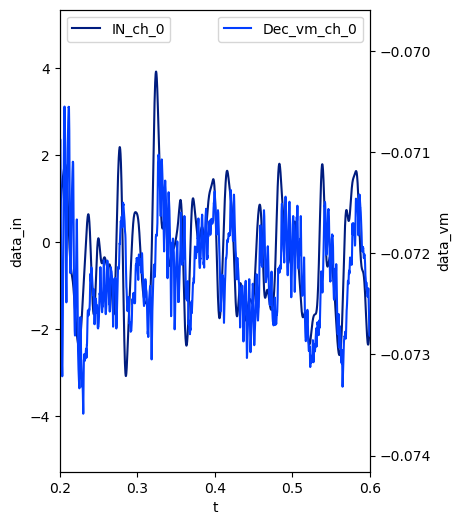

In [17]:
plt.rcParams["figure.figsize"] = (4, 6)
PM.viz.show_readout_on_input(results_filename=file_to_display, normalize=False, unit_idx_list=[0], savefigname=f"Fig3B_HiFi_show_readout_on_input.eps")
plt.xlim((0.2, 0.6))

Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure3B\Fig3B_HiFi_show_input_to_readout_coherence.eps


(2000.0, 6000.0)

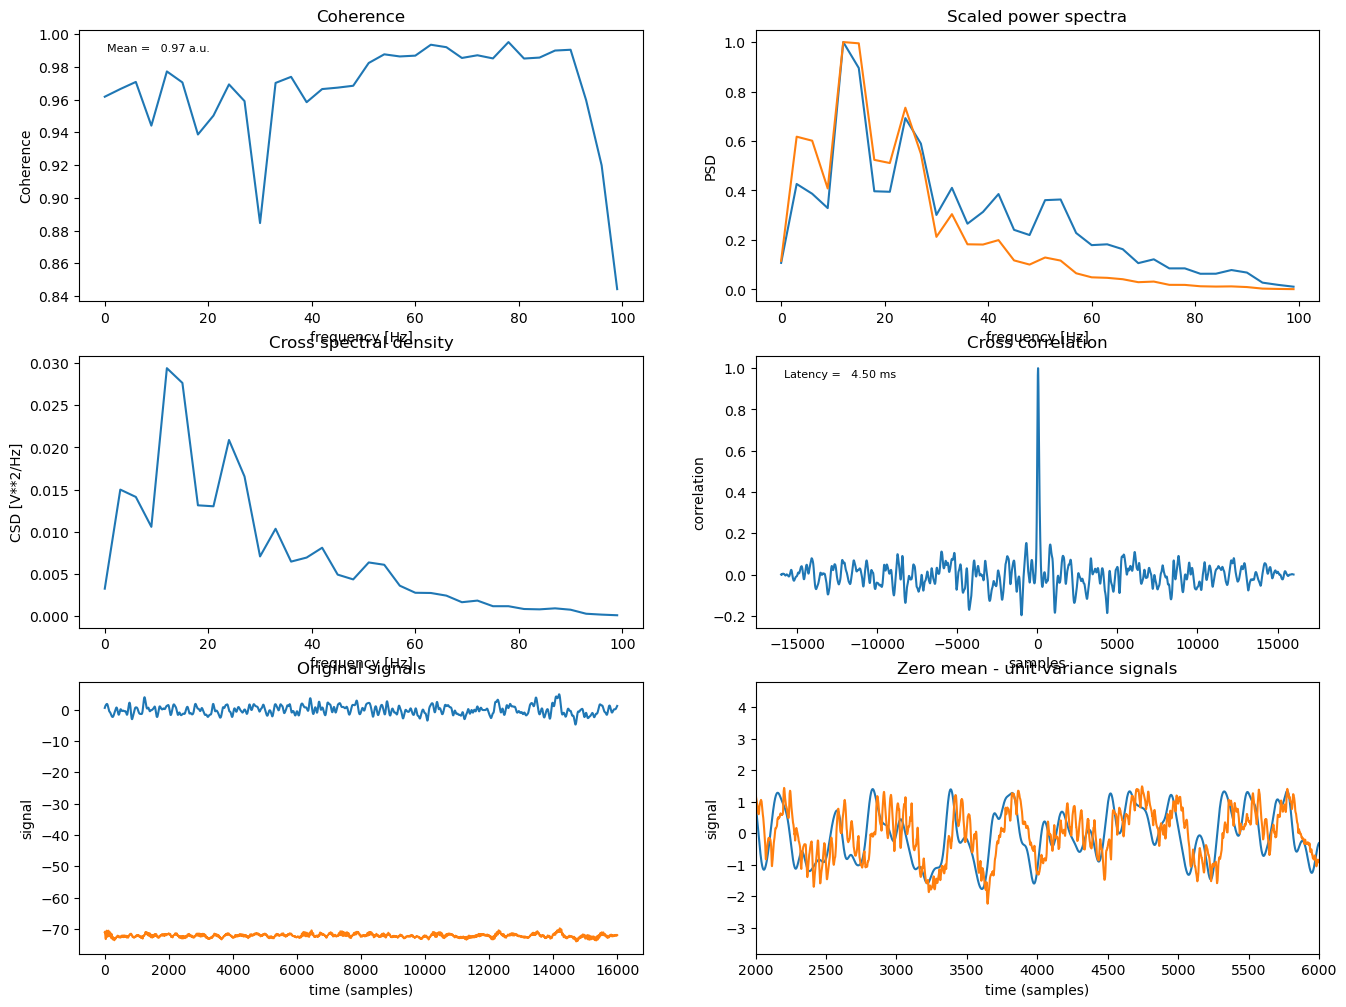

In [18]:
plt.rcParams["figure.figsize"] = (16, 12)
PM.viz.show_input_to_readout_coherence(
    results_filename=file_to_display, savefigname="Fig3B_HiFi_show_input_to_readout_coherence.eps", signal_pair=[0, 0]
)
plt.xlim((2000, 6000))